In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod

In [31]:
class ImageProcessor(ABC):

    @abstractmethod
    def load_image(self, path):
        pass

    @abstractmethod
    def apply_filter(self):
        pass

    @abstractmethod
    def show_image(self):
        pass

In [33]:
class GrayScaleFilter(ImageProcessor):

    def __init__(self):
        self.original = None
        self.filtered = None

    def load_image(self, path):
        self.original = cv2.imread(path)

    def apply_filter(self):
        self.filtered = cv2.cvtColor(self.original, cv2.COLOR_BGR2GRAY)

    def show_image(self):
        plt.figure(figsize=(10, 4))

        
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(self.original, cv2.COLOR_BGR2RGB))
        plt.title("Original")

        
        plt.subplot(1, 2, 2)
        plt.imshow(self.filtered, cmap='gray')
        plt.title("Escala de grises")

        plt.show()

In [35]:
class BlurFilter(ImageProcessor):

    def __init__(self):
        self.original = None
        self.filtered = None

    def load_image(self, path):
        self.original = cv2.imread(path)

    def apply_filter(self):
       
        self.filtered = cv2.GaussianBlur(self.original, (11, 11), 0)

    def show_image(self):
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(self.original, cv2.COLOR_BGR2RGB))
        plt.title("Original")

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(self.filtered, cv2.COLOR_BGR2RGB))
        plt.title("Desenfoque")

        plt.show()


In [37]:
def procesar_carpeta(carpeta, filtro, carpeta_salida):
    """
    Recorre carpetas y subcarpetas (recursivamente) y procesa JPG y PNG.
    """
    for item in os.listdir(carpeta):
        ruta = os.path.join(carpeta, item)

        if os.path.isdir(ruta):
            
            procesar_carpeta(ruta, filtro, carpeta_salida)

        elif item.lower().endswith((".jpg", ".png", ".jpeg")):

            print(f"Procesando: {ruta}")

            filtro.load_image(ruta)
            filtro.apply_filter()
            filtro.show_image()

            
            nombre_salida = os.path.join(carpeta_salida, f"filtrado_{item}")

            
            if isinstance(filtro, GrayScaleFilter):
                cv2.imwrite(nombre_salida, filtro.filtered)
            else:
                cv2.imwrite(nombre_salida, filtro.filtered)

Ingrese la ruta de la carpeta con imágenes:  C:\Users\JORGE\Downloads\ARCHIVOS DE IMAGEN



Seleccione filtro a aplicar:
1. Escala de grises
2. Desenfoque


Opción:  1


Procesando: C:\Users\JORGE\Downloads\ARCHIVOS DE IMAGEN\COLOMBIA.png


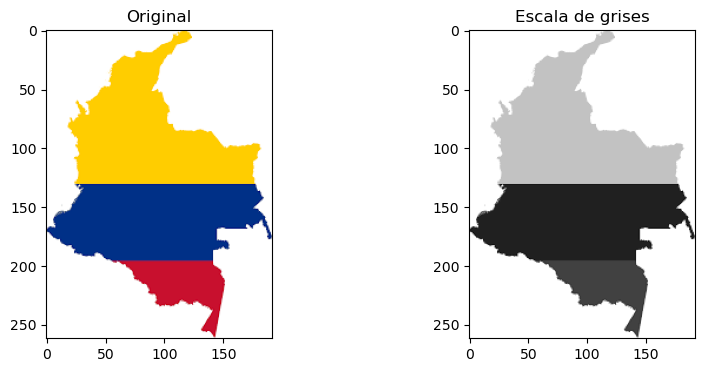

Procesando: C:\Users\JORGE\Downloads\ARCHIVOS DE IMAGEN\imagen1.png


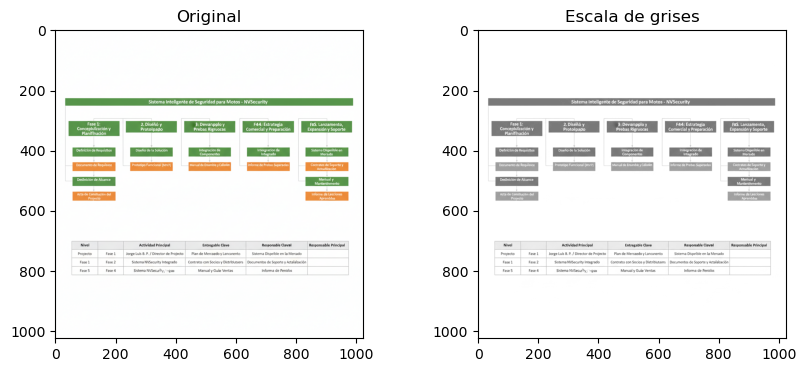

Procesando: C:\Users\JORGE\Downloads\ARCHIVOS DE IMAGEN\resultados\filtrado_COLOMBIA.png


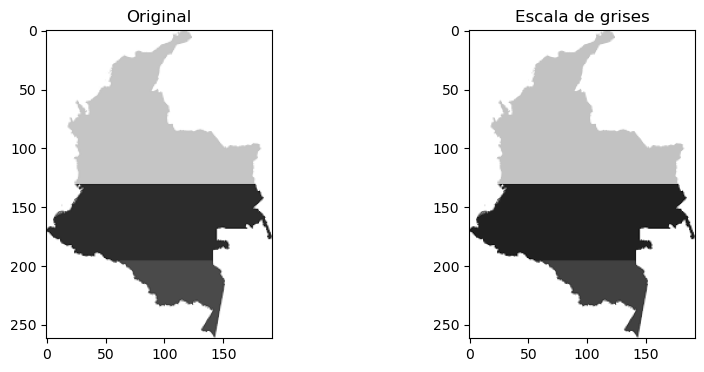

Procesando: C:\Users\JORGE\Downloads\ARCHIVOS DE IMAGEN\resultados\filtrado_imagen1.png


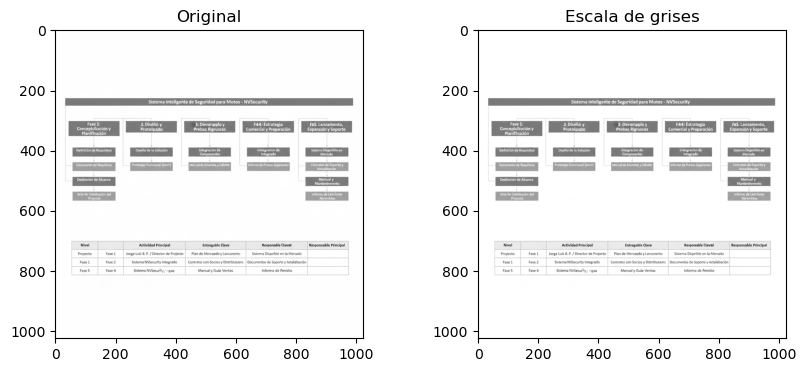


Procesamiento completado.
Las imágenes se guardaron en: C:\Users\JORGE\Downloads\ARCHIVOS DE IMAGEN\resultados


In [39]:
carpeta = input("Ingrese la ruta de la carpeta con imágenes: ")


carpeta_salida = os.path.join(carpeta, "resultados")
os.makedirs(carpeta_salida, exist_ok=True)


print("\nSeleccione filtro a aplicar:")
print("1. Escala de grises")
print("2. Desenfoque")
opcion = input("Opción: ")

if opcion == "1":
    filtro = GrayScaleFilter()
elif opcion == "2":
    filtro = BlurFilter()
else:
    print("Opción inválida")
    exit()

procesar_carpeta(carpeta, filtro, carpeta_salida)

print("\nProcesamiento completado.")
print(f"Las imágenes se guardaron en: {carpeta_salida}")